In [1]:
import h5py as hp
%matplotlib inline
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np
import hc_lib.plots.figlib as flib
import illustris_python as il
import matplotlib.gridspec as gspec
import matplotlib as mpl
import copy

In [3]:
SIM = 'tng100'
SNAP = 99
f = hp.File('/home/cosinga/scratch/hcolor/run/post/results/real2D_99.hdf5', 'r')
print(list(f.keys()))
blue_real = f['blue_2Dpk']
red_real = f['red_2Dpk']

['blue_2Dpk', 'red_2Dpk']


In [154]:
from scipy.ndimage.filters import gaussian_filter


def extractData():
    data = []
    print(len(f.results['2Dpk']))
    for d in f.results['2Dpk']:
        data.append(d.getValues())
        print(d.getProp('color'))
        print(d.getProp('space'))
    return data

def plot_pk(ax, cax, pk2d, realpk = None, cmap = 'viridis', vlim = [0, 4.5], 
            nlevels = 100, pk_contours = [2.5, 3, 4], do_smooth = True, 
            smooth_sigma = 0.6, do_real = False):
    plt.sca(ax)
    vmin, vmax = vlim
    norm = mpl.colors.Normalize(vmin, vmax)
    kpar = np.unique(pk2d[0])
    kper = np.unique(pk2d[1])
    KPAR, KPER = np.meshgrid(kpar, kper)
    pk = np.reshape(pk2d[2], KPAR.shape)
    levels = np.linspace(vmin, vmax, nlevels)

#     lo_mask = pk <= 10**vmin
#     hi_mask = pk > 10**vmax
#     pk[lo_mask] = 10**vmin
#     pk[hi_mask] = 10**vmax
    plt.contourf(KPAR, KPER, np.log10(pk), levels = nlevels, cmap = cmap, vmin = vmin, vmax = vmax)
    smap = mpl.cm.ScalarMappable(norm = norm, cmap = cmap)
    plt.colorbar(smap, cax = cax)
    if do_smooth:
        smoothed = gaussian_filter(np.log10(pk[12:, 12:]), sigma = smooth_sigma)
        data = np.log10(pk)
        data[12:, 12:] = smoothed
    else:
        data = np.log10(pk)

    plt.contour(KPAR, KPER, data, levels = pk_contours, colors = 'black')
    
    if do_real:
        realpk = np.reshape(realpk[2], KPAR.shape)
#         if do_smooth:
#             data = gaussian_filter(np.log10(realpk), sigma = smooth_sigma)
#         else:
#             data = np.log10(realpk)
        
        plt.contour(KPAR, KPER, np.log10(realpk), levels = pk_contours, colors = 'black', linestyles = 'dashed')
#     circles = np.sqrt(np.log10(KPAR) ** 2 + np.log10(KPER) **2)
#     plt.contour(KPAR, KPER, circles, levels = 100, colors = 'black', linestyles = ':')
    plt.xlim(0.1, 2)
    plt.ylim(0.1, 2)
    plt.xscale('log')
    plt.yscale('log')
    return


In [146]:
f = pkl.load(open('/home/cosinga/scratch/hcolor/output/fiducial_%sB_%03dS_0A_800R/results/galaxygrid_%sB_%03dS_0A_800R.pkl_rlib.pkl'%(SIM, SNAP, SIM, SNAP), 'rb'))

data = extractData()
blue = data[0]
red = data[1]


3
blue
redshift
red
redshift
resolved
redshift


Text(0, 0.5, 'log ($P(k)$ (cMpc / h)$^3$)')

<Figure size 432x288 with 0 Axes>

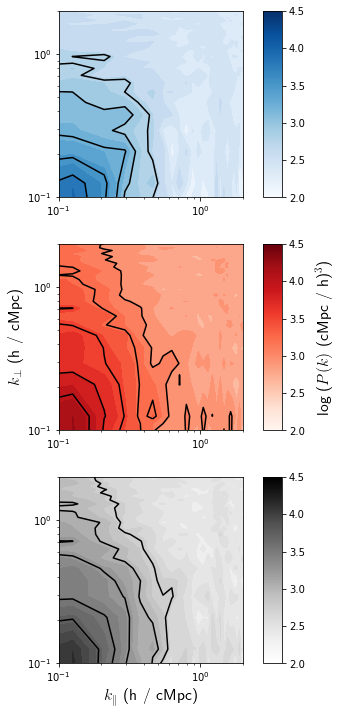

In [148]:
plt.clf()
fig, axes = plt.subplots(3, 2, gridspec_kw = {'width_ratios':[1, .1], 'hspace':0.25}, figsize = (4, 12))
cmaps = ['Blues', 'Reds', 'Greys']
bcont = np.arange(2.75, 4.0, 0.25)
rcont = np.arange(3.0, 4.25, 0.25)
gcont = np.arange(2.75, 4.0, 0.25)
conts = [bcont, rcont, gcont]
for i in range(3):
    
    plot_pk(axes[i, 0], axes[i, 1], data[i], cmap = cmaps[i], vlim = [2, 4.5], smooth_sigma = 0.6, pk_contours = conts[i])
    
axes[-1, 0].set_xlabel(r'$k_\parallel$ (h / cMpc)', usetex = True, fontsize = 16)
axes[1, 0].set_ylabel(r'$k_\perp$ (h / cMpc)', usetex = True, fontsize = 16)
axes[1, 1].set_ylabel(r'log ($P(k)$ (cMpc / h)$^3$)', usetex = True, fontsize = 16, labelpad = 10)

Text(0, 0.5, 'log ($P(k)$ (cMpc / h)$^3$)')

<Figure size 432x288 with 0 Axes>

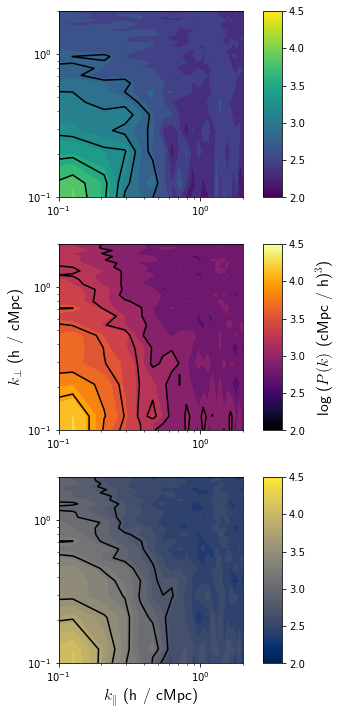

In [149]:
plt.clf()
fig, axes = plt.subplots(3, 2, gridspec_kw = {'width_ratios':[1, .1], 'hspace':0.25}, figsize = (4, 12))
cmaps = ['viridis', 'inferno', 'cividis']
bcont = np.arange(2.75, 4.0, 0.25)
rcont = np.arange(3.0, 4.25, 0.25)
gcont = np.arange(2.75, 4.0, 0.25)
conts = [bcont, rcont, gcont]
for i in range(3):
    
    plot_pk(axes[i, 0], axes[i, 1], data[i], cmap = cmaps[i], vlim = [2, 4.5], smooth_sigma = 0.6, pk_contours = conts[i])
    
axes[-1, 0].set_xlabel(r'$k_\parallel$ (h / cMpc)', usetex = True, fontsize = 16)
axes[1, 0].set_ylabel(r'$k_\perp$ (h / cMpc)', usetex = True, fontsize = 16)
axes[1, 1].set_ylabel(r'log ($P(k)$ (cMpc / h)$^3$)', usetex = True, fontsize = 16, labelpad = 10)

Text(0, 0.5, 'log ($P(k)$ (cMpc / h)$^3$)')

<Figure size 432x288 with 0 Axes>

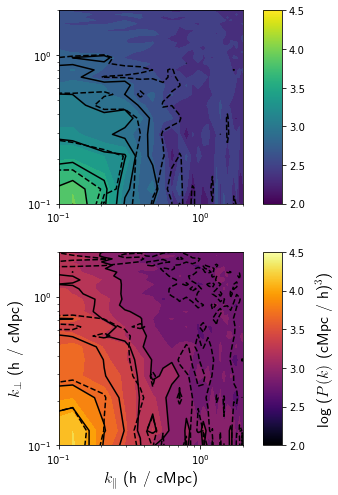

In [155]:
plt.clf()
fig, axes = plt.subplots(2, 2, gridspec_kw = {'width_ratios':[1, .1], 'hspace':0.25}, figsize = (4, 8))
cmaps = ['viridis', 'inferno', 'cividis']
real_data = [blue_real, red_real]
for i in range(2):
    plot_pk(axes[i, 0], axes[i, 1], data[i], real_data[i], cmap = cmaps[i], vlim = [2, 4.5], pk_contours = conts[i], do_real = True, do_smooth = False)
axes[-1, 0].set_xlabel(r'$k_\parallel$ (h / cMpc)', usetex = True, fontsize = 16)
axes[1, 0].set_ylabel(r'$k_\perp$ (h / cMpc)', usetex = True, fontsize = 16)
axes[1, 1].set_ylabel(r'log ($P(k)$ (cMpc / h)$^3$)', usetex = True, fontsize = 16, labelpad = 10)

[ 0.0418879   0.12566371  0.20943951  0.29321531  0.37699112  0.46076692
  0.54454273  0.62831853  0.71209433  0.79587014  0.87964594  0.96342175
  1.04719755  1.13097336  1.21474916  1.29852496  1.38230077  1.46607657
  1.54985238  1.63362818  1.71740398  1.80117979  1.88495559  1.9687314
  2.0525072   2.136283    2.22005881  2.30383461  2.38761042  2.47138622
  2.55516202  2.63893783  2.72271363  2.80648944  2.89026524  2.97404105
  3.05781685  3.14159265  3.22536846  3.30914426  3.39292007  3.47669587
  3.56047167  3.64424748  3.72802328  3.81179909  3.89557489  3.97935069
  4.0631265   4.1469023   4.23067811  4.31445391  4.39822972  4.48200552
  4.56578132  4.64955713  4.73333293  4.81710874  4.90088454  4.98466034
  5.06843615  5.15221195  5.23598776  5.31976356  5.40353936  5.48731517
  5.57109097  5.65486678  5.73864258  5.82241838  5.90619419  5.98996999
  6.0737458   6.1575216   6.24129741  6.32507321  6.40884901  6.49262482
  6.57640062  6.66017643  6.74395223  6.82772803  6.

[]

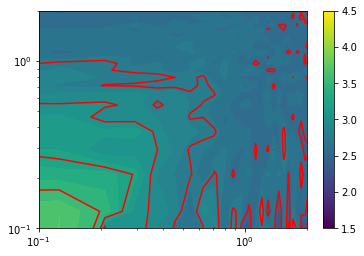

In [100]:
cont_spacing = 0.25
kpar = np.unique(blue_real[0])
kper = np.unique(blue_real[1])
KPAR, KPER = np.meshgrid(kpar, kper)
print(KPAR[0, :])
blue_pk = np.reshape(blue_real[2], KPAR.shape)
blue_pk = np.log10(blue_pk)
vmin = 1.5; vmax = 4.5
plt.contourf(KPAR, KPER, blue_pk, levels = 100, vmin = vmin, vmax = vmax)
plt.contour(KPAR, KPER, blue_pk, levels = np.arange(vmin, vmax+cont_spacing, cont_spacing), colors = 'red')
norm = mpl.colors.Normalize(vmin, vmax)
smap = mpl.cm.ScalarMappable(norm = norm, cmap = 'viridis')
plt.colorbar(smap)
plt.ylim(.1, 2)
plt.xlim(.1, 2)
plt.loglog()

In [44]:
blue_pk

array([[-9.23584893,  4.28375321,  3.46873029, ...,  2.69469914,
         2.56234578,  1.77599105],
       [ 3.63050786,  3.84531215,  3.55624303, ...,  2.34165377,
         2.73625974,  2.50984147],
       [ 3.36610499,  3.39491195,  3.29302516, ...,  2.4080909 ,
         2.78171064,  2.54027496],
       ...,
       [ 2.79536732,  2.66241955,  2.6292541 , ...,  2.88217873,
         3.06565166,  3.10078144],
       [ 2.59354388,  2.78867798,  2.8993262 , ...,  2.9983633 ,
         3.08053162,  3.17888132],
       [ 0.33197214,  3.17372646,  3.02292838, ...,  1.95466701,
         2.86162737,  2.36234673]])

In [ ]:
f = pkl.load(open('/home/cosinga/scratch/hcolor/output/fiducial_%sB_%03dS_0A_800R/results/vnXgalaxy_%sB_%03dS_0A_800R.pkl_rlib.pkl'%(SIM, SNAP, SIM, SNAP), 'rb'))


In [ ]:
data = extractData()

In [ ]:

fig, axes = plt.subplots(3, 2, gridspec_kw = {'width_ratios':[1, .1], 'hspace':0.25}, figsize = (4, 12))
cmaps = ['Blues', 'Reds', 'Greys']
for i in range(3):
    print('finished_plot')
    plot_pk(axes[i, 0], axes[i, 1], data[i], cmap = cmaps[i], vlim = [-4, 4], cont_spacing = 1)
axes[-1, 0].set_xlabel(r'$k_\parallel$ (h / cMpc)', usetex = True, fontsize = 16)
axes[1, 0].set_ylabel(r'$k_\perp$ (h / cMpc)', usetex = True, fontsize = 16)
axes[1, 1].set_ylabel(r'log ($P(k)$ (cMpc / h)$^3$)', usetex = True, fontsize = 16, labelpad = 10)